In [8]:
import cirq
import numpy as np
import scipy as sp
from cirq.circuits import InsertStrategy
from cirq import ry, rz, CZ, H, CX, X
import matplotlib.pyplot as plt
from tqdm import tqdm

In [40]:
circuit = cirq.Circuit()
qubits = [cirq.LineQubit(i) for i in range(1)]
circuit.append(X.on(qubits[0]))
circuit.append(cirq.ops.depolarize(0.1).on_each(qubits), strategy = InsertStrategy.NEW_THEN_INLINE)
first_rho = execute(circuit)
for i in range(4096):
    rho = execute(circuit)
    norm = np.linalg.norm(rho - first_rho)
    if (norm > 0):
        print(norm)

In [26]:
D = cirq.ops.depolarize(0.04)
print(dir(D))
D._mixture_()

['__abstractmethods__', '__add__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__pow__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__weakref__', '_abc_impl', '_act_on_', '_backwards_compatibility_num_qubits', '_circuit_diagram_info_', '_commutes_', '_commutes_on_qids_', '_default_shape_from_num_qubits', '_delegate', '_has_mixture_', '_has_stabilizer_effect_', '_implemented_by_', '_json_dict_', '_mixture_', '_mul_with_qubits', '_n_qubits', '_num_qubits_', '_num_qubits_from_shape', '_num_qubits_proto_from_num_qubits', '_p', '_qid_shape_', '_rmul_with_qubits', '_value_equality_values_', '_value_equality_values_cls_', 'controlled', 'n_qubits', 'num_qubits', 'on', 'on_each', 'p',

((0.96,
  array([[1., 0.],
         [0., 1.]])),
 (0.013333333333333334,
  array([[0.+0.j, 1.+0.j],
         [1.+0.j, 0.+0.j]])),
 (0.013333333333333334,
  array([[0.+0.j, 0.-1.j],
         [0.+1.j, 0.+0.j]])),
 (0.013333333333333334,
  array([[ 1.+0.j,  0.+0.j],
         [ 0.+0.j, -1.+0.j]])))

In [419]:
def ansatz_alt(circuit, qubits, num_layers, eps=0.04):
    rand_y = []
    rand_z = []
    for i, _ in enumerate(qubits):
        rand_y.append(np.random.ranf())
        rand_z.append(np.random.ranf())
    for _ in range(num_layers):
        for i, q in enumerate(qubits):
            circuit.append(ry(rand_y[i] * 2 * np.pi).on(q))
        for i, q in enumerate(qubits):
            circuit.append(rz(rand_z[i] * 2 * np.pi).on(q))
        for i in range(len(qubits)):
            circuit.append(CZ(qubits[i], qubits[(i+1) % len(qubits)]))
        circuit.append(cirq.ops.depolarize(eps).on_each(qubits), strategy = InsertStrategy.NEW_THEN_INLINE)

In [394]:
def ansatz_alt_2(circuit, qubits, num_layers, eps=0.04):
    rand_y = []
    rand_z = []
    ry_angle = np.random.ranf()
    rz_angle = np.random.ranf()
#     rz_angle = ry_angle
    for i, _ in enumerate(qubits):
        rand_y.append(ry_angle)
        rand_z.append(rz_angle)
    for _ in range(num_layers):
        for i, q in enumerate(qubits):
            circuit.append(ry(rand_y[i] * 2 * np.pi).on(q))
        for i, q in enumerate(qubits):
            circuit.append(rz(rand_z[i] * 2 * np.pi).on(q))
        for i in range(len(qubits)):
            circuit.append(CZ(qubits[i], qubits[(i+1) % len(qubits)]))
        circuit.append(cirq.ops.depolarize(eps).on_each(qubits), strategy = InsertStrategy.NEW_THEN_INLINE)

In [409]:
def ansatz_alt_3(circuit, qubits, num_layers, eps=0.04):
    for _ in range(num_layers):
        rand_y = []
        rand_z = []
        angle = np.random.ranf()
        for i, _ in enumerate(qubits):
            rand_y.append(angle)
            rand_z.append(angle)
        for i, q in enumerate(qubits):
            circuit.append(ry(rand_y[i] * 2 * np.pi).on(q))
        for i, q in enumerate(qubits):
            circuit.append(rz(rand_z[i] * 2 * np.pi).on(q))
        for i in range(len(qubits)):
            circuit.append(CZ(qubits[i], qubits[(i+1) % len(qubits)]))
        circuit.append(cirq.ops.depolarize(eps).on_each(qubits), strategy = InsertStrategy.NEW_THEN_INLINE)

In [393]:
def ansatz(circuit, qubits, num_layers, eps=0.04):        
    for _ in range(num_layers):
        for q in qubits:
            circuit.append(ry(np.random.ranf() * 2 * np.pi).on(q))
        for q in qubits:
            circuit.append(rz(np.random.ranf() * 2 * np.pi).on(q))
        for i in range(len(qubits)):
            circuit.append(CZ(qubits[i], qubits[(i+1) % len(qubits)]))
        circuit.append(cirq.ops.depolarize(eps).on_each(qubits), strategy = InsertStrategy.NEW_THEN_INLINE)

In [252]:
circuit = cirq.Circuit()
n = 3
qubits = [cirq.LineQubit(i) for i in range(n)]
ansatz(circuit, qubits, 2)
print(circuit)

0: ───Ry(0.709π)───Rz(0.507π)───@───────@───D(0.04)───Ry(0.2π)─────Rz(0.02π)────@───────@───D(0.04)───
                                │       │                                       │       │
1: ───Ry(0.14π)────Rz(0.888π)───@───@───┼───D(0.04)───Ry(0.125π)───Rz(0.139π)───@───@───┼───D(0.04)───
                                    │   │                                           │   │
2: ───Ry(0.433π)───Rz(0.965π)───────@───@───D(0.04)───Ry(0.134π)───Rz(0.132π)───────@───@───D(0.04)───


In [140]:
def ghz(circuit, qubits):
    circuit.append(H.on(qubits[0]))
    for i in range(len(qubits) - 1):
        circuit.append(CX(qubits[i], qubits[(i+1)]))

In [141]:
circuit = cirq.Circuit()
n = 3
qubits = [cirq.LineQubit(i) for i in range(n)]
ghz(circuit, qubits)
ghz_plus = circuit

ghz_minus = ghz_plus.copy()
ghz_minus.insert(0, X.on(qubits[0]))    # make this a GHZ- state

psi = execute(ghz_plus)
phi = execute(ghz_minus)
print(ghz_plus)
print(ghz_minus)
print(np.trace(psi @ phi))

0: ───H───@───────
          │
1: ───────X───@───
              │
2: ───────────X───
0: ───X───H───@───────
              │
1: ───────────X───@───
                  │
2: ───────────────X───
0j


In [142]:
class HaarRandomUnitary(cirq.Gate):        
    def __init__(self):
        super(HaarRandomUnitary, self)
        self.unitary = cirq.testing.random_unitary(2**3)

    def _num_qubits_(self):
        return 3

    def _unitary_(self):
        return self.unitary
    
    def _circuit_diagram_info_(self, args):
        return "U", "U", "U"

In [431]:
def get_layered_circuit(num_qubits, U, num_layers):
    circuit = cirq.Circuit()
    n = num_qubits
    qubits = [cirq.LineQubit(i) for i in range(n)]
    ghz(circuit, qubits)
    circuit.append(U.on(*qubits))
    ansatz_alt(circuit, qubits, num_layers)
    return circuit, qubits

U = HaarRandomUnitary()
psi_circ, psi_qubits = get_layered_circuit(3, U, 2) # GHZ+
phi_circ = psi_circ.copy()
phi_qubits = psi_qubits
phi_circ.insert(0, X.on(phi_qubits[0]))    # make this a GHZ- state

print(psi_circ)
print(phi_circ)

0: ───H───@───────U───Ry(1.65π)───Rz(0.896π)───@───────@───D(0.04)───Ry(1.65π)───Rz(0.896π)───@───────@───D(0.04)───
          │       │                            │       │                                      │       │
1: ───────X───@───U───Ry(1.65π)───Rz(0.896π)───@───@───┼───D(0.04)───Ry(1.65π)───Rz(0.896π)───@───@───┼───D(0.04)───
              │   │                                │   │                                          │   │
2: ───────────X───U───Ry(1.65π)───Rz(0.896π)───────@───@───D(0.04)───Ry(1.65π)───Rz(0.896π)───────@───@───D(0.04)───
0: ───X───H───@───────U───Ry(1.65π)───Rz(0.896π)───@───────@───D(0.04)───Ry(1.65π)───Rz(0.896π)───@───────@───D(0.04)───
              │       │                            │       │                                      │       │
1: ───────────X───@───U───Ry(1.65π)───Rz(0.896π)───@───@───┼───D(0.04)───Ry(1.65π)───Rz(0.896π)───@───@───┼───D(0.04)───
                  │   │                                │   │                               

In [421]:
def execute(circuit: cirq.Circuit) -> float:
    rho = cirq.DensityMatrixSimulator().simulate(circuit).final_density_matrix
    return rho

In [422]:
class RemoveDepolarizing(cirq.PointOptimizer):
    def optimization_at(self, circuit: cirq.Circuit, index: int, op: cirq.Operation):
        if isinstance(op.gate, cirq.DepolarizingChannel):
            return cirq.PointOptimizationSummary(clear_span=1,
                                                 new_operations=[],
                                                 clear_qubits=op.qubits)
        else:
            return None

In [423]:
psi_exact = psi_circ.copy()
RemoveDepolarizing().optimize_circuit(psi_exact)
print(psi_exact)      

0: ───H───@───────U───Ry(0.821π)───Rz(0.594π)───@───────@───────Ry(0.821π)───Rz(0.594π)───@───────@───────
          │       │                             │       │                                 │       │
1: ───────X───@───U───Ry(0.48π)────Rz(0.15π)────@───@───┼───────Ry(0.48π)────Rz(0.15π)────@───@───┼───────
              │   │                                 │   │                                     │   │
2: ───────────X───U───Ry(0.725π)───Rz(0.858π)───────@───@───────Ry(0.725π)───Rz(0.858π)───────@───@───────


In [424]:
class BoostDepolarizing(cirq.PointOptimizer):
    def __init__(self, epsilon, post_clean_up = lambda op_list: op_list):
        self.epsilon = epsilon
        super().__init__(post_clean_up=post_clean_up)
    
    def optimization_at(self, circuit: cirq.Circuit, index: int, op: cirq.Operation):
        if isinstance(op.gate, cirq.DepolarizingChannel):
            return cirq.PointOptimizationSummary(clear_span=1,
                                                 new_operations=[cirq.DepolarizingChannel(self.epsilon).on(op.qubits[0])],
                                                 clear_qubits=op.qubits)
        else:
            return None

In [425]:
psi_boosted = psi_circ.copy()
BoostDepolarizing(0.08).optimize_circuit(psi_boosted)
print(psi_boosted)

0: ───H───@───────U───Ry(0.821π)───Rz(0.594π)───@───────@───D(0.08)───Ry(0.821π)───Rz(0.594π)───@───────@───D(0.08)───
          │       │                             │       │                                       │       │
1: ───────X───@───U───Ry(0.48π)────Rz(0.15π)────@───@───┼───D(0.08)───Ry(0.48π)────Rz(0.15π)────@───@───┼───D(0.08)───
              │   │                                 │   │                                           │   │
2: ───────────X───U───Ry(0.725π)───Rz(0.858π)───────@───@───D(0.08)───Ry(0.725π)───Rz(0.858π)───────@───@───D(0.08)───


In [435]:
n = 3
R = 2
epsilon = 0.04 * 3.0/4.0 # cirq implements depolarizing different than paper
num_layers = range(1,20+1)
# num_layers = range(1,3+1)
# num_layers = [1, 5, 10, 15, 20]
# num_layers = [1, 10, 20]
num_executions = 100
# num_layers = range(1,1+1)
e_delta_max = []
e_delta_max_biased = []
gamma = [2.6667, -2, 0.3333]
for l in tqdm(num_layers):
    e_delta = 0.0
    e_delta_biased = 0.0
    for i in range(num_executions):
        U = HaarRandomUnitary()
        psi_circ, psi_qubits = get_layered_circuit(n, U, l) # GHZ+
#         phi_circ, phi_qubits = get_layered_circuit(n, U, l) 
        phi_circ = psi_circ.copy()
        phi_qubits = psi_qubits.copy()
        phi_circ.insert(0, X.on(phi_qubits[0]))    # make this a GHZ- state
        
        psi_circ_noiseless = psi_circ.copy()
        phi_circ_noiseless = phi_circ.copy()
        RemoveDepolarizing().optimize_circuit(psi_circ_noiseless)
        RemoveDepolarizing().optimize_circuit(phi_circ_noiseless)
        
        psi_exact = execute(psi_circ_noiseless)
        phi_exact = execute(phi_circ_noiseless)
        
#         print(psi_circ_noiseless)
#         print(phi_circ_noiseless)
#         print(np.trace(psi_exact @ phi_exact))
        
        weighted_psi = []
        weighted_phi = []

#         rho_exact = (psi_exact - phi_exact)
#         A =  0.5 * sp.linalg.sqrtm(rho_exact.conj().T @ np.linalg.inv(rho_exact))
#         A = psi_exact.conj().T - np.eye(8) * 0.5
        A = psi_exact - (np.eye(8) * 0.5)
#         rho_exact = psi_exact - phi_exact
#         print(np.trace((A + np.eye(8) * 0.5) @ rho_exact))
#         print(0.5 * np.sum(np.abs(np.linalg.eigvalsh(rho_exact))))
#         print(0.5 * np.trace(sp.linalg.sqrtm(rho_exact.conj().T @ rho_exact)))
        psi_tensored = None
        phi_tensored = None
        # TODO: try different epsilon (0.02, 0.03) and see how it scales
        for r in range(R+1):
            psi_r = psi_circ.copy()
            BoostDepolarizing(epsilon * 2**r).optimize_circuit(psi_r)
#             print(psi_r)
            phi_r = phi_circ.copy()
            BoostDepolarizing(epsilon * 2**r).optimize_circuit(phi_r)
#             print(phi_r)

            psi_noisy = execute(psi_r)
            phi_noisy = execute(phi_r)

#             print(np.trace(psi_exact @ A).real)
#             print(np.trace(psi_noisy @ A).real)
#             print(np.trace(phi_exact @ A).real)    
#             print(np.trace(phi_noisy @ A).real)
            
            exp_psi = np.trace(psi_noisy @ A).real
            exp_phi = np.trace(phi_noisy @ A).real

            weighted_psi.append(gamma[r] * exp_psi)
            weighted_phi.append(gamma[r] * exp_phi)
            
            if psi_tensored is None:
                psi_tensored = psi_noisy
            else:
                psi_tensored = np.kron(psi_tensored, psi_noisy)
                
            if phi_tensored is None:
                phi_tensored = phi_noisy
            else:
                phi_tensored = np.kron(phi_tensored, phi_noisy)
                
        b_psi = np.sum(weighted_psi) - np.trace(psi_exact @ A).real
        b_phi = np.sum(weighted_phi) - np.trace(phi_exact @ A).real
                        
        # take the trace distance
        rho = (psi_tensored - phi_tensored)
        Dt = 0.5 * np.sum(np.abs(np.linalg.eigvalsh(rho))) # rho is Hermitian, so we can take a shortcut
#         print(Dt)
#         Dt = 0.5 * np.trace(sp.linalg.sqrtm(rho.conj().T @ rho))
        e_delta = max(e_delta, 1/Dt.real)
        e_delta_biased = max(e_delta_biased, (1 + b_psi - b_phi)/Dt.real)
#         e_delta_biased = max(e_delta_biased, (1 - 2 * max(b_psi, b_phi))/Dt.real)
#     print(Dt)
    e_delta_max.append(e_delta)
    e_delta_max_biased.append(e_delta_biased)
    
print("Done")

100%|██████████| 20/20 [11:32<00:00, 34.64s/it]

Done


In [436]:
print(e_delta_max)
print(e_delta_max_biased)

[1.021094766014859, 1.072018635516823, 1.135888635735218, 1.234416111111765, 1.3492460339416616, 1.4692065213469623, 1.615068257102233, 1.80270048082497, 1.9273817137404567, 2.0603235871101813, 2.2593705706530707, 2.4947240024987067, 2.7805173051288836, 3.032994622862812, 3.390702779129894, 3.687832726615689, 4.093022665763515, 4.652365432679389, 5.048949077052134, 5.6673369736870995]
[1.0207639055359807, 1.0670702192202923, 1.1161761297676904, 1.1894797658545289, 1.2599247373722418, 1.3165497035152312, 1.394931176586043, 1.4717375065123321, 1.5024795499294548, 1.5316107407019215, 1.574487684281072, 1.6271377104704856, 1.6905091162177048, 1.7382865226771398, 1.7566924263654278, 1.8255953561111316, 1.8128180398980596, 1.8966164743614518, 1.883746556794839, 1.948300550755813]


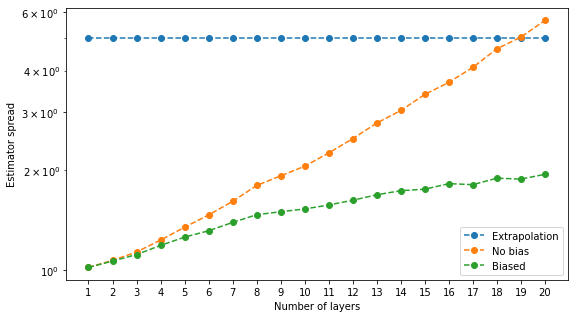

In [437]:
e_extrapolation = np.ones_like(e_delta_max) * 5

plt.figure(figsize=(9, 5))
plt.plot(num_layers, e_extrapolation, "--o", label="Extrapolation")
plt.plot(num_layers, e_delta_max, "--o", label="No bias")
plt.plot(num_layers, e_delta_max_biased, "--o", label="Biased")

plt.xlabel("Number of layers")
plt.ylabel("Estimator spread")

plt.xticks(num_layers)
plt.yscale('log')
plt.yticks([1, 3e0, 6e0])

plt.legend()
# plt.savefig('images/zne_noise_models3.png', dpi=300, facecolor='white')
plt.show();